### TESTE DE HIPÓTESE:

#### Mulheres tem salários menores do que homens?

###Etapa 1: Importando bibliotecas e a base de dados

#### Importando as bibliotecas

In [16]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu


### Importando a base de dados

In [17]:
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Etapa 2: Entendendo os dados

In [18]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [20]:
#Verificando valores nulos:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [23]:
#Retirando os valores nulos:
df = df.dropna()
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


###Verificando a quantidade de gêneros no dataset:

In [25]:
df['Gender'].value_counts()


,count
Gender,
Male,3671
Female,3013
Other,14


In [28]:
#separando apenas Masculino e Feminino para a hipótese:
df = df[df['Gender'].isin(['Male', 'Female'])]
df['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013


### Etapa 3: Análise Exploratória

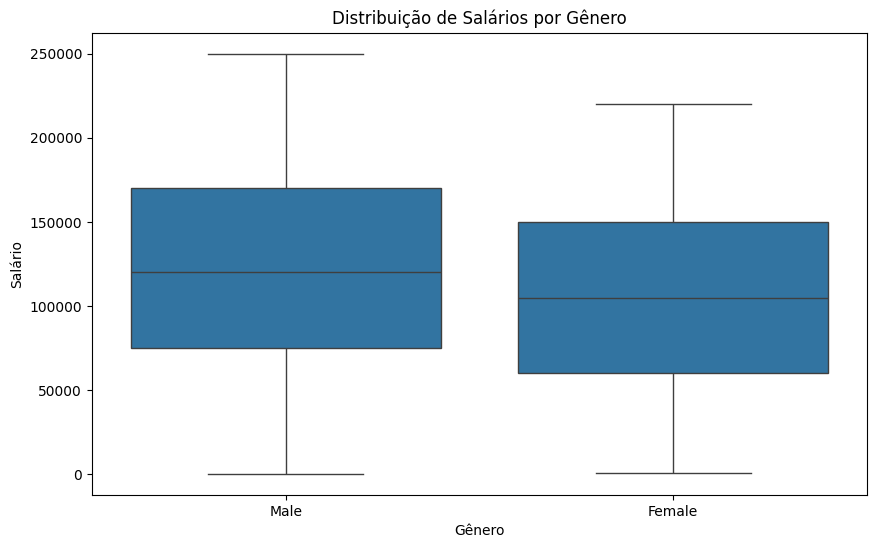

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Distribuição de Salários por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.show()


In [31]:
#Verificar as médias:
df.groupby('Gender')['Salary'].mean()


,Salary
Gender,
Female,107888.998672
Male,121395.697630



#Definição das hipóteses
##H₀: Os salários médios de homens e mulheres são iguais.

##H₁: Os salários médios são diferentes.

###Etapa 4: Separar os grupos:

In [36]:
salario_fem = df[df['Gender'] == 'Female']['Salary']
salario_masc = df[df['Gender'] == 'Male']['Salary']

###Testar a normalidade:

In [37]:
print("Shapiro-Wilk - Mulheres:", shapiro(salario_fem))
print("Shapiro-Wilk - Homens:", shapiro(salario_masc))


Shapiro-Wilk - Mulheres: ShapiroResult(statistic=np.float64(0.9565078003199263), pvalue=np.float64(4.190125281939249e-29))
Shapiro-Wilk - Homens: ShapiroResult(statistic=np.float64(0.955656434432701), pvalue=np.float64(4.8620043401467395e-32))


#### Como ambos os p-valores são muito menores que 0.05, temos fortes evidências de que os salários de ambos os grupos não seguem uma distribuição normal. Portanto, não é adequado usar o teste t de Student, que exige normalidade. Seguiremos com o teste de ***Mann-Whitney***



In [38]:
from scipy.stats import mannwhitneyu

estat, p_valor = mannwhitneyu(salario_fem, salario_masc)
print(f'Estatística U de Mann-Whitney: {estat:.2f}')
print(f'p-valor: {p_valor:.4f}')

if p_valor < 0.05:
    print("Resultado: Existe diferença estatisticamente significativa entre os salários de homens e mulheres.")
else:
    print("Resultado: Não há evidência suficiente para afirmar que os salários são diferentes.")


Estatística U de Mann-Whitney: 4722562.50
p-valor: 0.0000
Resultado: Existe diferença estatisticamente significativa entre os salários de homens e mulheres.


##O p-valor representa a probabilidade de observar uma diferença tão grande quanto a que vimos (ou maior), assumindo que H₀ seja verdadeira.

#H₁: Os salários médios são diferentes.

> Rejeitamos H0 e validamos H1 com um grande grau de certeza.

